# <h1 style="background-color:white;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Waste Classification</h1>




# ![waste](360_F_356695553_DGCg4F6KpySgbyzQBIBb2FmOIH6Vj51m.jpg)

# Meta Data



### Description
This dataset comprises images categorically organized into four folders representing different types of waste materials: Food Organics, Metal, Miscellaneous Trash, and Plastic. The dataset is designed for the purpose of waste classification and management. It includes a total of 2,617 images, with each folder containing images specific to its waste type.

### Contents:

Food Organics folder: Contains 411 images depicting various types of organic waste materials.

Metal folder: Consists of 790 images showcasing different metallic waste items.

Miscellaneous Trash folder: Encompasses 495 images representing diverse types of non-categorized waste materials.

Plastic folder: Contains 921 images illustrating different plastic waste items.

### Image Specifications:

All images in the dataset have consistent dimensions of 524 pixels width and 524 pixels height.

Each image is composed of three color channels, providing RGB color representation.

### Purpose:
The dataset aims to facilitate research and development in waste classification, recycling, and management through machine learning and computer vision techniques. It serves as a resource for training and evaluating models for automatic waste recognition and sorting systems.

# import the important libraries 

In [25]:
import numpy as np  #matrics,array,mathmatical function 
import matplotlib.pyplot as plt   #visualization
import PIL #Python Imaging Library (PIL),opening, manipulating, and saving many different image file formats.
import tensorflow as tf #pen-source machine learning framework developed by Google.tools for building and training machine learning models,
from tensorflow import keras # provides an easy-to-use interface for building and training deep learning models.
from tensorflow.keras import layers, models #provide classes and functions for building neural network layers and models, respectively.
from tensorflow.keras.models import Sequential #linear stack of layers for building neural network models.
import cv2 #OpenCV provides tools and functions for tasks such as object detection, image processing, and feature detection.
import os #provides a portable way to interact with the operating system ,open images on jupter
from IPython.display import Image, display #to display images within Jupyter 
from PIL import Image  
from tensorflow.keras.preprocessing.image import ImageDataGenerator #ImageDataGenerator is used for real-time data augmentation and preprocessing of image data during model training.
from sklearn.utils.class_weight import compute_class_weight #his function is used to compute class weights for imbalanced datasets
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout #layers for cnn model 
from keras.layers import LeakyReLU #activation function commonly used in deep neural network
from keras.callbacks import EarlyStopping #Early stopping is a technique used to prevent overfitting during model training ,stopping training when the metric stops improving.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


### let's explore the real data before spliting it 

In [2]:
data_path =  r"C:\Users\user\Downloads\AI,Image practical\Dataset_after_seperation\ALL_DATA"

In [9]:
# Retrieve the names of all folders (representing trash types) within the dataset directory
garbage_types = os.listdir(data_path)  #etrieve a list of all items

# Set to store unique image dimensions for the entire dataset
all_dimensions_set = set() #used to store unique image dimensions 

# Iterate over each trash type (folder) to process images
for garbage_type in garbage_types:
    folder_path = os.path.join(data_path, garbage_type)
    
    # Verify that the current item is a directory
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]
        
        # Display the count of images in the current folder
        num_images = len(image_files)
        print(f"{garbage_type} folder contains {num_images} images.")
        
        # Loop over each image to check its dimensions
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                # Extract the width, height, and channels (color depth) of the image and add to the dimensions set
                width, height = img.size
                channels = len(img.getbands())   #calculate colors for images
                all_dimensions_set.add((width, height, channels))
                
# Determine if all images in the entore dataset have the same dimensions
if len(all_dimensions_set) == 1: 
    width, height, channel = all_dimensions_set.pop()
    print(f"\nAll images in the dataset have the same dimensions: {width}x{height} with {channels} color channels.")
else:
    print("\nThe images in the dataset have different dimensions or color channels.")

Food Organics folder contains 411 images.
Metal folder contains 790 images.
Miscellaneous Trash folder contains 495 images.
Plastic folder contains 921 images.

All images in the dataset have the same dimensions: 524x524 with 3 color channels.


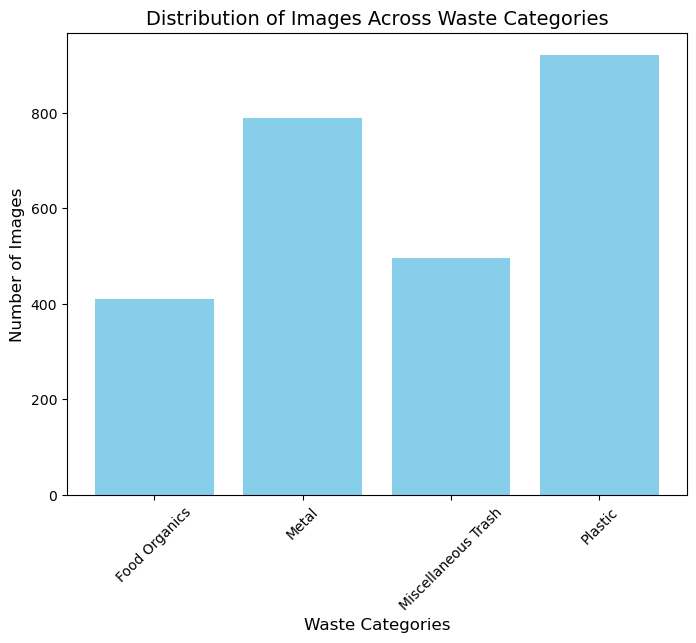

In [10]:
# Assuming garbage_types contains the list of folder names representing garbage categories and their corresponding image counts
garbage_type_counts = {
    'Food Organics':411 ,
    'Metal': 790,
    'Miscellaneous Trash':495 ,
    'Plastic': 921
}

# Create a histogram
plt.figure(figsize=(8, 6))
plt.bar(garbage_type_counts.keys(), garbage_type_counts.values(), color='skyblue')
plt.xlabel('Waste Categories', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Distribution of Images Across Waste Categories', fontsize=14)
plt.xticks(rotation=45)
plt.show()


# <h1 style="background-color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Explore the images from each Waste Category</h1>


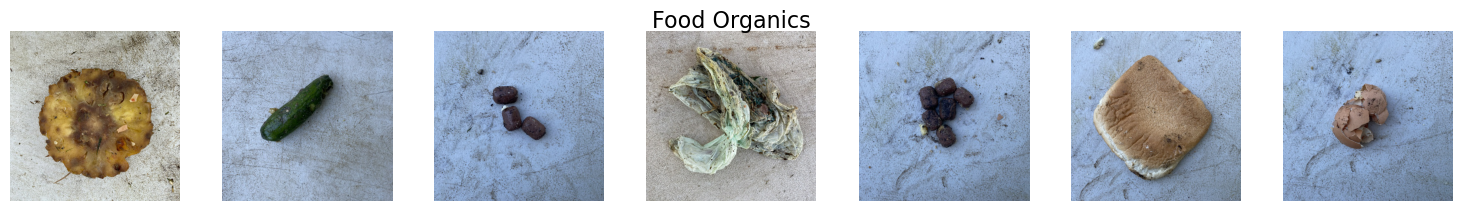

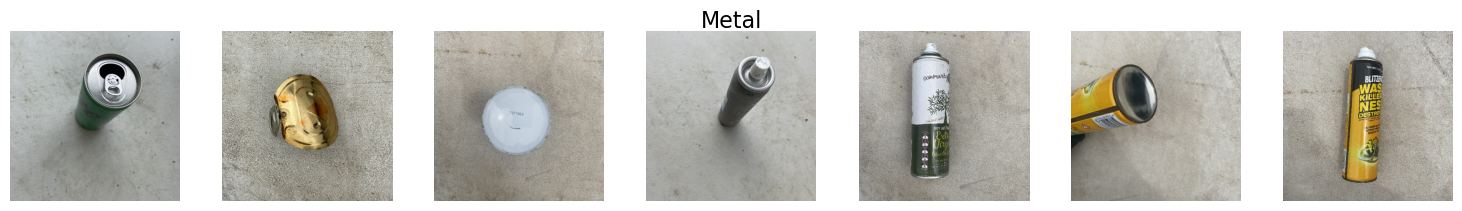

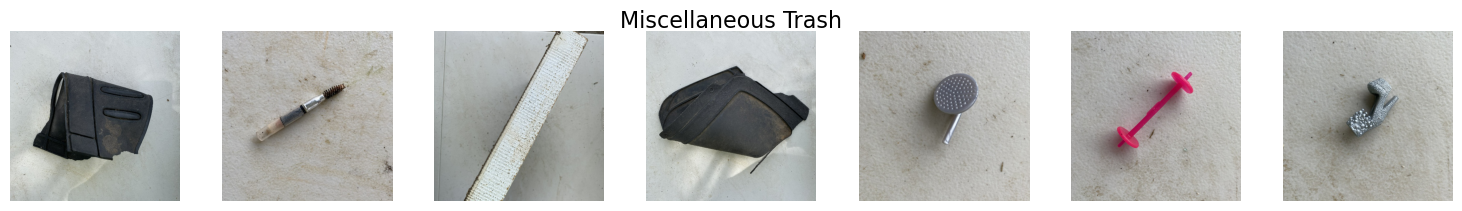

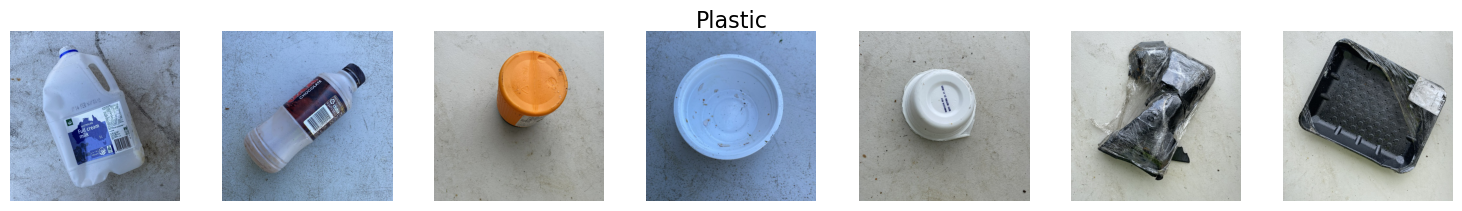

In [12]:
# Iterate over each trash type (folder) to display images
for garbage_type in garbage_types:
    folder_path = os.path.join(data_path, garbage_type)
    
    # Verify that the current item is a directory
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]
        
        # Select the first 7images
        image_files = image_files[:7]
        
        # Set up subplots
        fig, axs = plt.subplots(1, 7, figsize=(15, 2))
        
        for i, image_file in enumerate(image_files):
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                axs[i].imshow(img)
                axs[i].axis('off')
        
        plt.tight_layout()
        fig.suptitle(garbage_type, fontsize=16, y=1.03)
        plt.show()

# Split the datset

In [8]:
# Define the paths to the train, test, and validation directories
data_train_path = r"C:\Users\hp\Downloads\AI practical\Dataset_after_seperation\train70"
data_test_path = r"C:\Users\hp\Downloads\AI practical\Dataset_after_seperation\test15"
data_validation_path = r"C:\Users\hp\Downloads\AI practical\Dataset_after_seperation\validation15"

# Dataset Analysis and Visualization


### Train Dataset

In [9]:
# Retrieve the names of all folders (representing trash types) within the dataset directory
garbage_types = os.listdir(data_train_path)  #etrieve a list of all items

# Set to store unique image dimensions for the entire dataset
all_dimensions_set = set() #used to store unique image dimensions 

# Iterate over each trash type (folder) to process images
for garbage_type in garbage_types:
    folder_path = os.path.join(data_train_path, garbage_type)
    
    # Verify that the current item is a directory
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]
        
        # Display the count of images in the current folder
        num_images = len(image_files)
        print(f"{garbage_type} folder contains {num_images} images.")
        
        # Loop over each image to check its dimensions
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                # Extract the width, height, and channels (color depth) of the image and add to the dimensions set
                width, height = img.size
                channels = len(img.getbands())   #calculate colors for images
                all_dimensions_set.add((width, height, channels))
                
# Determine if all images in the entore dataset have the same dimensions
if len(all_dimensions_set) == 1: 
    width, height, channel = all_dimensions_set.pop()
    print(f"\nAll images in the dataset have the same dimensions: {width}x{height} with {channels} color channels.")
else:
    print("\nThe images in the dataset have different dimensions or color channels.")

Food Organics70 folder contains 289 images.
Metal70 folder contains 554 images.
Miscellaneous Trash70 folder contains 347 images.
Plastic70 folder contains 645 images.

All images in the dataset have the same dimensions: 524x524 with 3 color channels.


In [10]:
image_width=180
image_height=180
input_shape = (image_width, image_height, 3) 

In [11]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(image_width,image_height),
    batch_size=32,
    validation_split=False)

    

Found 1835 files belonging to 4 classes.


In [12]:
data_cat=data_train.class_names
data_cat

['Food Organics70', 'Metal70', 'Miscellaneous Trash70', 'Plastic70']

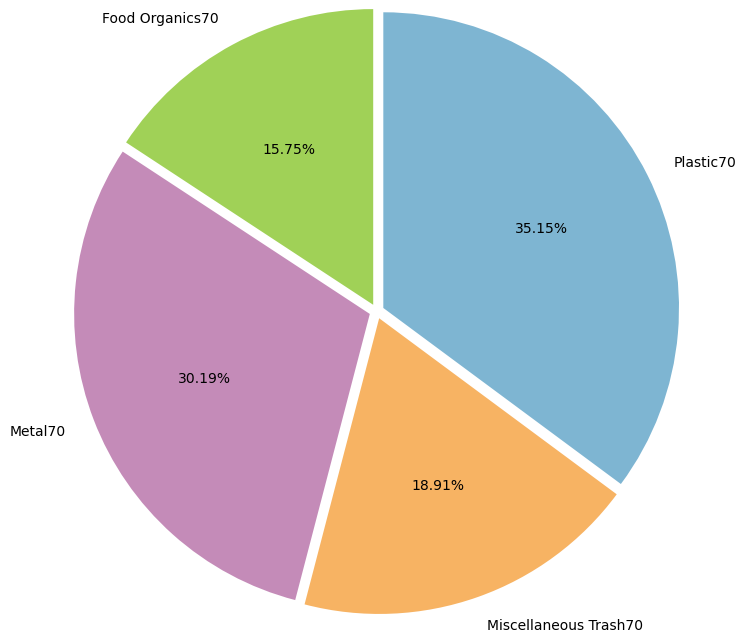

In [13]:
# Calculate the number of samples in each class
class_samples = [0] * len(data_cat)
for images, labels in data_train:
    for label in labels:
        class_samples[label] += 1

# Set the explode list to be the same length as the number of classes
explode = [0.05] * len(data_cat)

colors = ['#a0d157', '#c48bb8', '#f7b363', '#7eb5d2']
plt.pie(class_samples, startangle=90, explode=explode, autopct='%0.2f%%',
        labels=data_cat, colors=colors, radius=2)
plt.show()


### Test Dataset

In [19]:
# Retrieve the names of all folders (representing trash types) within the dataset directory
garbage_types = os.listdir(data_test_path)  #etrieve a list of all items

# Set to store unique image dimensions for the entire dataset
all_dimensions_set = set() #used to store unique image dimensions 

# Iterate over each trash type (folder) to process images
for garbage_type in garbage_types:
    folder_path = os.path.join(data_test_path, garbage_type)
    
    # Verify that the current item is a directory
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]
        
        # Display the count of images in the current folder
        num_images = len(image_files)
        print(f"{garbage_type} folder contains {num_images} images.")
        
        # Loop over each image to check its dimensions
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                # Extract the width, height, and channels (color depth) of the image and add to the dimensions set
                width, height = img.size
                channels = len(img.getbands())   #calculate colors for images
                all_dimensions_set.add((width, height, channels))
                
# Determine if all images in the entore dataset have the same dimensions
if len(all_dimensions_set) == 1: 
    width, height, channel = all_dimensions_set.pop()
    print(f"\nAll images in the dataset have the same dimensions: {width}x{height} with {channels} color channels.")
else:
    print("\nThe images in the dataset have different dimensions or color channels.")

Food Organics15 folder contains 61 images.
Metal15 folder contains 119 images.
Miscellaneous Trash15 folder contains 74 images.
Plastic15 folder contains 138 images.

All images in the dataset have the same dimensions: 524x524 with 3 color channels.


In [20]:
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(image_width,image_height),
    batch_size=32,
    validation_split=False)

Found 392 files belonging to 4 classes.


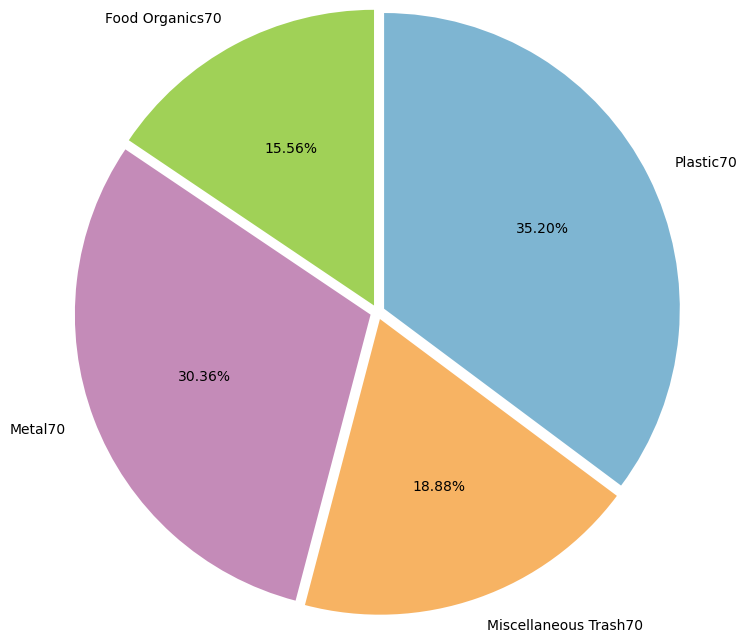

In [21]:
# Calculate the number of samples in each class
class_samples = [0] * len(data_cat)
for images, labels in data_test:
    for label in labels:
        class_samples[label] += 1

# Set the explode list to be the same length as the number of classes
explode = [0.05] * len(data_cat)

colors = ['#a0d157', '#c48bb8', '#f7b363', '#7eb5d2']
plt.pie(class_samples, startangle=90, explode=explode, autopct='%0.2f%%',
        labels=data_cat, colors=colors, radius=2)
plt.show()

### Validation Dataset

In [22]:
# Retrieve the names of all folders (representing trash types) within the dataset directory
garbage_types = os.listdir(data_validation_path)  #etrieve a list of all items

# Set to store unique image dimensions for the entire dataset
all_dimensions_set = set() #used to store unique image dimensions 

# Iterate over each trash type (folder) to process images
for garbage_type in garbage_types:
    folder_path = os.path.join(data_validation_path, garbage_type)
    
    # Verify that the current item is a directory
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]
        
        # Display the count of images in the current folder
        num_images = len(image_files)
        print(f"{garbage_type} folder contains {num_images} images.")
        
        # Loop over each image to check its dimensions
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                # Extract the width, height, and channels (color depth) of the image and add to the dimensions set
                width, height = img.size
                channels = len(img.getbands())   #calculate colors for images
                all_dimensions_set.add((width, height, channels))
                
# Determine if all images in the entore dataset have the same dimensions
if len(all_dimensions_set) == 1: 
    width, height, channel = all_dimensions_set.pop()
    print(f"\nAll images in the dataset have the same dimensions: {width}x{height} with {channels} color channels.")
else:
    print("\nThe images in the dataset have different dimensions or color channels.")

Food Organics15 folder contains 61 images.
Metal15 folder contains 118 images.
Miscellaneous Trash15 folder contains 74 images.
Plastic15 folder contains 138 images.

All images in the dataset have the same dimensions: 524x524 with 3 color channels.


In [23]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    shuffle=True,
    image_size=(image_width,image_height),
    batch_size=32,
    validation_split=False)

Found 391 files belonging to 4 classes.


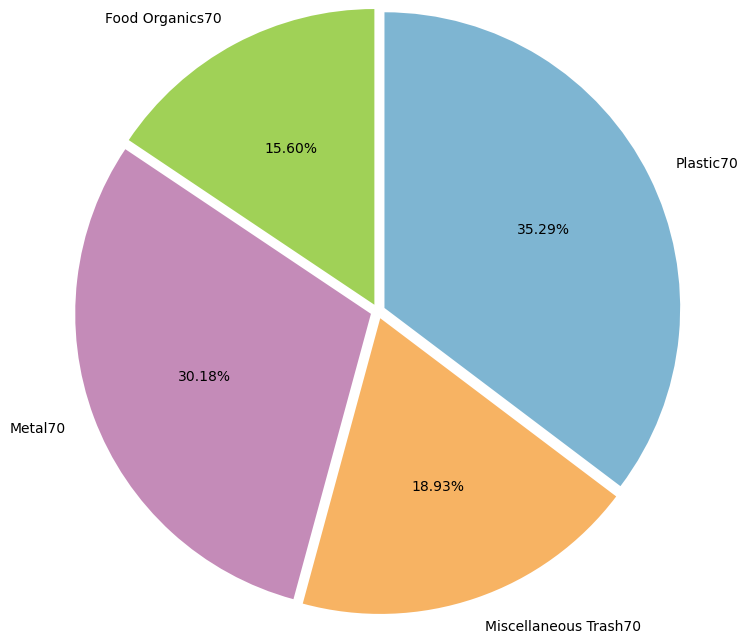

In [24]:
# Calculate the number of samples in each class
class_samples = [0] * len(data_cat)
for images, labels in data_val:
    for label in labels:
        class_samples[label] += 1

# Set the explode list to be the same length as the number of classes
explode = [0.05] * len(data_cat)

colors = ['#a0d157', '#c48bb8', '#f7b363', '#7eb5d2']
plt.pie(class_samples, startangle=90, explode=explode, autopct='%0.2f%%',
        labels=data_cat, colors=colors, radius=2)
plt.show()

# <h1 style="background-color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Explore the images from each Waste Category in the Train Datase</h1>

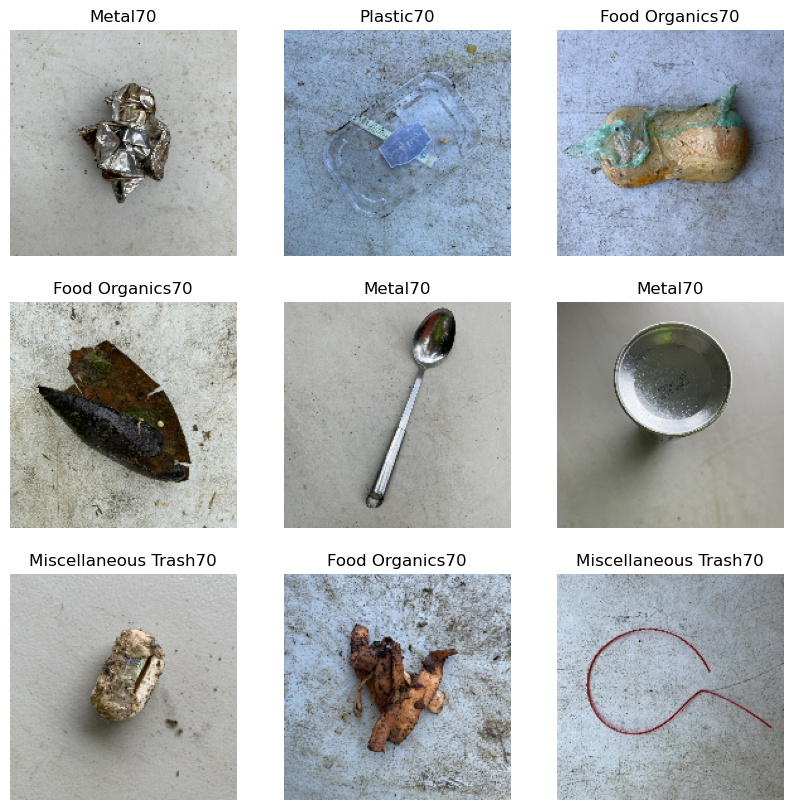

In [25]:
# Assuming data_train is a tf.data.Dataset object containing image-label pairs
for image, label in data_train.take(1):  # Taking one batch from the dataset
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Assuming the batch size is 9
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[label[i]])  # Assuming data_cat is a dictionary mapping label indices to category names
        plt.axis('off')
    plt.show()


# Class Weights 

In [51]:
# Get the total number of samples
total_samples = 0
for images, labels in data_train:
    total_samples += len(labels)              #calculates the total number of samples in the training

# Calculate the number of samples in each class
class_samples = [0] * len(data_cat)
for images, labels in data_train:
    for label in labels:
        class_samples[label] += 1

# Calculate class weights
class_weights = []
for i, samples in enumerate(class_samples):
    weight = total_samples / (len(data_cat) * samples)
    class_weights.append(weight)
    print("Class:", data_cat[i], "Weight:", weight)


Class: Food Organics70 Weight: 1.5873702422145328
Class: Metal70 Weight: 0.8280685920577617
Class: Miscellaneous Trash70 Weight: 1.3220461095100864
Class: Plastic70 Weight: 0.7112403100775194


# Estimated Weights (Regression)

In [58]:
segment_folder = r"C:\Users\user\Downloads\AI,Image practical\segment images"
output_folder=r"C:\Users\user\Downloads\AI,Image practical\output"

In [73]:
image_folder = data_train_path

# Load the pre-trained DeepLabV3Plus model
model = tf.keras.applications.EfficientNetB7( #DL model for processing images for regression,classification
    include_top=False,
    weights="imagenet",  #weigh based on image net
    input_tensor=tf.keras.Input(shape=(None, None, 3)),
)

# Define the class labels
class_labels = ['Miscellaneous Trash70','Food Organics70', 'Plastic70','Metal70']

# Constant weight per unit area (grams per square pixel)
weight_per_unit_area = {'Metal70': 0.002, 'Plastic70': 0.0015, 'Food Organics70': 0.001, 'Miscellaneous Trash70':0.001}  # (grams per square pixel) for each class

In [56]:
# Segment each image in the folder and estimate weight
for class_label in class_labels:
    class_folder = os.path.join(image_folder, class_label)
    for filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, filename)   #calculates its aspect ratio, resizes it while maintaining the aspect ratio, 
        image_path = os.path.join(class_folder, filename)        
        image = Image.open(image_path)
        width, height = image.size  #converts it to a NumPy array, expands the dimensions to match the model's input shape
        aspect_ratio = width / height
        target_size = (180, int(180 / aspect_ratio)) if aspect_ratio >= 1 else (int(180 * aspect_ratio), 180)
        image = image.resize(target_size)  # Resize the image while maintaining aspect ratio
        image_array = tf.keras.preprocessing.image.img_to_array(image)     #convert image to np
        image_array = tf.expand_dims(image_array, 0)  
        image_array = tf.keras.applications.efficientnet.preprocess_input(image_array) #preprocess image
        
        # Perform image segmentation
        segmentation_mask = model.predict(image_array)
        segmentation_mask = tf.argmax(segmentation_mask, axis=-1)  #maximum value in each pixel
        segmentation_mask = tf.squeeze(segmentation_mask)
        
        # Calculate mean intensity of segmentation mask
        mean_intensity = tf.reduce_mean(segmentation_mask).numpy() #computing the average value of all the pixel intensities in the mask
        
        # Calculate weight based on mean intensity
        weight = weight_per_unit_area[class_label] * mean_intensity
        
        # Save the segmentation mask as an image
        output_folder = r"C:\Users\user\Downloads\AI,Image practical\output"
        os.makedirs(output_folder, exist_ok=True)
        mask_filename = os.path.splitext(filename)[0] + '_mask.jpg'  # Saving as JPG
        mask_path = os.path.join(output_folder, mask_filename)
        Image.fromarray(segmentation_mask.numpy().astype('uint8')).save(mask_path)
        
        # Print the estimated weight for the image
        print(f"Image: {filename}, Class: {class_label}, Estimated Weight: {weight} grams")

1/1 [==============================] - 3s 3s/step
Image: Miscellaneous Trash_1.jpg, Class: Miscellaneous Trash70, Estimated Weight: 1.419 grams
1/1 [==============================] - 4s 4s/step
Image: Miscellaneous Trash_10.jpg, Class: Miscellaneous Trash70, Estimated Weight: 1.568 grams
1/1 [==============================] - 3s 3s/step
Image: Miscellaneous Trash_100.jpg, Class: Miscellaneous Trash70, Estimated Weight: 1.614 grams
1/1 [==============================] - 10s 10s/step
Image: Miscellaneous Trash_101.jpg, Class: Miscellaneous Trash70, Estimated Weight: 1.145 grams
1/1 [==============================] - 3s 3s/step
Image: Miscellaneous Trash_102.jpg, Class: Miscellaneous Trash70, Estimated Weight: 1.403 grams
1/1 [==============================] - 3s 3s/step
Image: Miscellaneous Trash_103.jpg, Class: Miscellaneous Trash70, Estimated Weight: 1.476 grams
1/1 [==============================] - 6s 6s/step
Image: Miscellaneous Trash_11.jpg, Class: Miscellaneous Trash70, Estimated 

In [57]:
total_weight_per_class = {class_label: 0 for class_label in class_labels}

# Loop through the segmented images and accumulate weights for each class
for class_label in class_labels:
    class_folder = os.path.join(output_folder, class_label)  # Assuming segmentation mask images are saved in separate folders for each class
    for filename in os.listdir(class_folder):
        # Calculate weight for the current image (similar to previous code)
        image_path = os.path.join(class_folder, filename)
        segmentation_mask = Image.open(image_path)
        mean_intensity = np.mean(np.array(segmentation_mask))
        weight = weight_per_unit_area[class_label] * mean_intensity
        
        # Accumulate weight for the current class
        total_weight_per_class[class_label] += weight

# Print total weight for each class
for class_label, total_weight in total_weight_per_class.items():
    print(f"Total Weight for {class_label}: {total_weight} grams")

Total Weight for Miscellaneous Trash70: 45.501199999999976 grams
Total Weight for Food Organics70: 38.201440000000034 grams
Total Weight for Plastic70: 122.80919999999996 grams
Total Weight for Metal70: 144.65064000000012 grams


Segmentation for each image ,save into segmenet folder


segmentation

In [59]:
# Iterate over each class label
for class_label in class_labels:
    class_folder = os.path.join(image_folder, class_label)
    segment_class_folder = os.path.join(segment_folder, class_label)

    # Create the output class folder if it doesn't exist
    if not os.path.exists(segment_class_folder):
        os.makedirs(segment_class_folder)

    # Iterate over each image in the class folder
    for filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, filename)

        # Load the image
        image = cv2.imread(image_path)

        # Perform thresholding
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

        # Save the segmented image
        output_path = os.path.join(segment_class_folder, filename)
        cv2.imwrite(output_path, binary_image)

        print(f"Segmented image saved: {output_path}")

Segmented image saved: C:\Users\user\Downloads\AI,Image practical\segment images\Miscellaneous Trash70\Miscellaneous Trash_1.jpg
Segmented image saved: C:\Users\user\Downloads\AI,Image practical\segment images\Miscellaneous Trash70\Miscellaneous Trash_10.jpg
Segmented image saved: C:\Users\user\Downloads\AI,Image practical\segment images\Miscellaneous Trash70\Miscellaneous Trash_100.jpg
Segmented image saved: C:\Users\user\Downloads\AI,Image practical\segment images\Miscellaneous Trash70\Miscellaneous Trash_101.jpg
Segmented image saved: C:\Users\user\Downloads\AI,Image practical\segment images\Miscellaneous Trash70\Miscellaneous Trash_102.jpg
Segmented image saved: C:\Users\user\Downloads\AI,Image practical\segment images\Miscellaneous Trash70\Miscellaneous Trash_103.jpg
Segmented image saved: C:\Users\user\Downloads\AI,Image practical\segment images\Miscellaneous Trash70\Miscellaneous Trash_11.jpg
Segmented image saved: C:\Users\user\Downloads\AI,Image practical\segment images\Miscel

detect object from segmented image then identifies its bounding then calculate high,weigh=high

In [62]:
pixel_to_cm = 0.01 
for class_label in os.listdir(segment_folder):
    class_folder = os.path.join(segment_folder, class_label)

    # Create a corresponding output folder for the class label
    output_class_folder = os.path.join(output_folder, class_label)
    os.makedirs(output_class_folder, exist_ok=True)

    # Iterate over each segmented image in the class folder
    for filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, filename)

        # Load the segmented image
        segmented_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Find contours of objects in the segmented image
        contours, _ = cv2.findContours(segmented_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Calculate total weight for the image
        total_weight = 0
        for contour in contours:
            # Calculate the bounding box of the contour
            x, y, w, h = cv2.boundingRect(contour)

            # Calculate the height of the object
            height_cm = h * pixel_to_cm

            # Set the weight equal to the height of the object
            weight = height_cm

            # Accumulate the total weight
            total_weight += weight

        # Save the total weight for the image
        output_text_file = os.path.join(output_class_folder, f"{filename}_weight.txt")
        with open(output_text_file, 'w') as file:
            file.write(f"Total weight for {filename}: {total_weight} centimeters")

        print(f"Total weight for {filename}: {total_weight} centimeters saved to {output_text_file}")

Total weight for Food Organics_1.jpg: 5.24 centimeters saved to C:\Users\user\Downloads\AI,Image practical\output\Food Organics70\Food Organics_1.jpg_weight.txt
Total weight for Food Organics_10.jpg: 5.24 centimeters saved to C:\Users\user\Downloads\AI,Image practical\output\Food Organics70\Food Organics_10.jpg_weight.txt
Total weight for Food Organics_100.jpg: 5.5200000000000005 centimeters saved to C:\Users\user\Downloads\AI,Image practical\output\Food Organics70\Food Organics_100.jpg_weight.txt
Total weight for Food Organics_101.jpg: 5.24 centimeters saved to C:\Users\user\Downloads\AI,Image practical\output\Food Organics70\Food Organics_101.jpg_weight.txt
Total weight for Food Organics_102.jpg: 6.1000000000000005 centimeters saved to C:\Users\user\Downloads\AI,Image practical\output\Food Organics70\Food Organics_102.jpg_weight.txt
Total weight for Food Organics_103.jpg: 5.25 centimeters saved to C:\Users\user\Downloads\AI,Image practical\output\Food Organics70\Food Organics_103.jpg

detect object from segmented image  ,identiefies its boundries,high,width,meancolor,shape

In [70]:
import csv
output_csv_file=r"C:\Users\user\Downloads\AI,Image practical\output_csv_file.csv"
pixel_to_cm = 0.01  # Assuming 1 pixel = 0.01 cm

# Initialize an empty list to store the extracted features
features = []

# Iterate over each class label
for class_label in os.listdir(segment_folder):
    class_folder = os.path.join(segment_folder, class_label)

    # Iterate over each segmented image in the class folder
    for filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, filename)

        # Load the segmented image
        segmented_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Find contours of objects in the segmented image
        contours, _ = cv2.findContours(segmented_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Extract features for each contour/object in the image
        for contour in contours:
            # Calculate the bounding box of the contour
            x, y, w, h = cv2.boundingRect(contour)

            # Convert width and height from pixels to centimeters
            width_cm = w * pixel_to_cm
            height_cm = h * pixel_to_cm

            # Calculate the area of the contour
            area = cv2.contourArea(contour)

            # Create a binary mask image based on the contour
            mask = np.zeros_like(segmented_image, dtype=np.uint8)
            cv2.drawContours(mask, [contour], 0, 255, thickness=cv2.FILLED)

            # Convert the segmented image to BGR format
            segmented_image_bgr = cv2.cvtColor(segmented_image, cv2.COLOR_GRAY2BGR)

            # Extract color features by calculating the mean color within the contour
            mean_color = cv2.mean(segmented_image_bgr, mask=mask)[:3]

            # Extract shape features
            shape = "Unknown"
            perimeter = cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)
            if len(approx) == 3:
                shape = "Triangle"
            elif len(approx) == 4:
                shape = "Rectangle"
            elif len(approx) > 4:
                shape = "Circle"

            # Create a dictionary to store the features of the current object
            object_features = {
                "Filename": filename,
                "Class": class_label,
                "Width (cm)": width_cm,
                "Height (cm)": height_cm,
                "Area": area,
                "Mean Color (B, G, R)": mean_color,
                "Shape": shape
            }

            # Append the object features to the list
            features.append(object_features)

# Save the extracted features into a CSV file
fieldnames = ["Filename", "Class", "Width (cm)", "Height (cm)", "Area", "Mean Color (B, G, R)", "Shape"]
with open(output_csv_file, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(features)

print(f"Extracted features saved to {output_csv_file}")

Extracted features saved to C:\Users\user\Downloads\AI,Image practical\output_csv_file.csv


In [23]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Model Training and Optimization

In [27]:
num_classes = len(data_cat)
input_shape = (image_width, image_height, 3)  # Assuming 3 color channels for RGB images

# Create the model
model = Sequential([
    # Convert images to grayscale
    layers.Conv2D(1, 1, padding='same', input_shape=input_shape), # kernel size of 1x1,convert the RGB images to grayscale.
    layers.LeakyReLU(alpha=0.1),  # activation function with a negative slope of 0.1.
    
    layers.Rescaling(1./255), #rescales the pixel values of the image to the range [0, 1].
    
    layers.Conv2D(16, 3, padding='same'), #creates a convolutional layer with 16 filters and a kernel size of 3x3.
    layers.LeakyReLU(alpha=0.1),  # Using Leaky ReLU activation
    layers.MaxPooling2D(), #applies max pooling to reduce the spatial dimensions of the feature maps.
    layers.Conv2D(32, 3, padding='same'),
    layers.LeakyReLU(alpha=0.1), 
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same'),
    layers.LeakyReLU(alpha=0.1), 
    layers.MaxPooling2D(),
    layers.Flatten(), #flattens the output from the previous layer into a 1D vector.
    layers.Dropout(0.2), #applies dropout regularization, randomly setting 20% of the input units to 0 at each update during training, to prevent overfitting.
    layers.Dense(128), #creates a fully connected layer with 128 units.
    layers.LeakyReLU(alpha=0.1),  # applies the Leaky ReLU activation function.
    layers.Dense(units=num_classes)  #creates the final output layer with units equal to the number of classes.
])

In [28]:
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# Define early stop flag
early_stop = True  # Set this to True or False based on your preference

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 1)       4         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 180, 180, 1)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 1)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 16)      160       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 180, 180, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                        

In [29]:
# Train the model
epochs_size =17
# Train the model
if early_stop:
    history = model.fit(data_train, epochs=epochs_size, validation_data=data_val, callbacks=[early_stopping])
else:
    history = model.fit(data_train, epochs=epochs_size, validation_data=data_val)

Epoch 1/17
58/58 [==============================] - 21s 335ms/step - loss: 1.2709 - accuracy: 0.3869 - val_loss: 1.2580 - val_accuracy: 0.3606
Epoch 2/17
58/58 [==============================] - 17s 297ms/step - loss: 1.1202 - accuracy: 0.4845 - val_loss: 1.1715 - val_accuracy: 0.4962
Epoch 3/17
58/58 [==============================] - 18s 312ms/step - loss: 1.0152 - accuracy: 0.5569 - val_loss: 1.0812 - val_accuracy: 0.5396
Epoch 4/17
58/58 [==============================] - 17s 297ms/step - loss: 0.9028 - accuracy: 0.6153 - val_loss: 0.9779 - val_accuracy: 0.5754
Epoch 5/17
58/58 [==============================] - 18s 298ms/step - loss: 0.7896 - accuracy: 0.6747 - val_loss: 0.9388 - val_accuracy: 0.6164
Epoch 6/17
58/58 [==============================] - 18s 312ms/step - loss: 0.6778 - accuracy: 0.7243 - val_loss: 0.9490 - val_accuracy: 0.6368
Epoch 7/17
58/58 [==============================] - 18s 303ms/step - loss: 0.5884 - accuracy: 0.7531 - val_loss: 1.0133 - val_accuracy: 0.6573

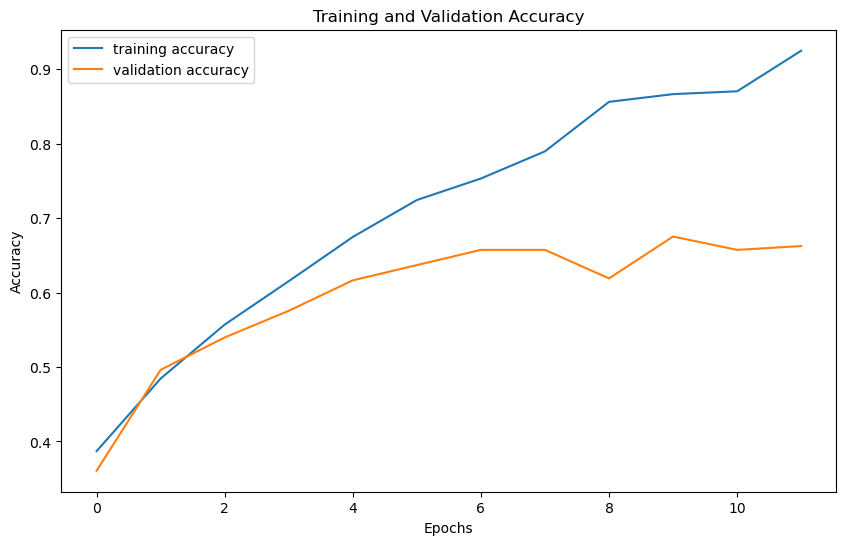

In [32]:
epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=[10,6])
plt.plot(epochs_range, history.history['accuracy'], label='training accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


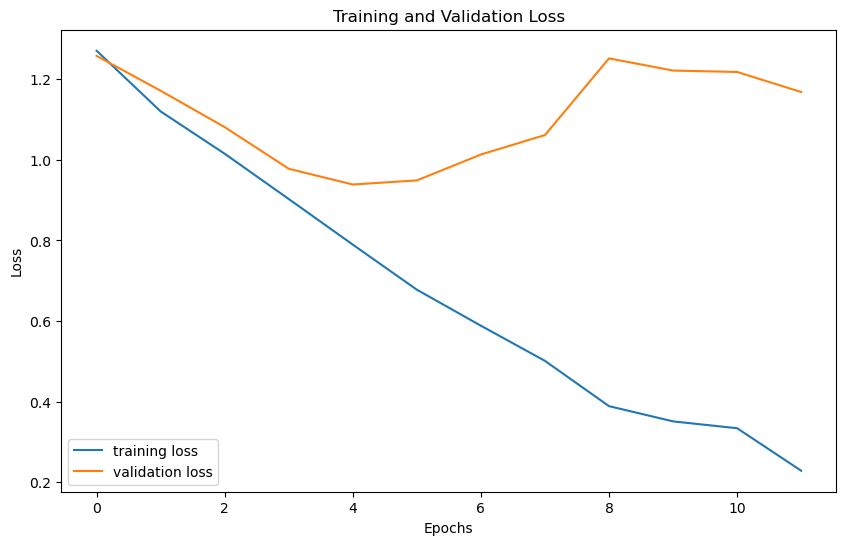

In [33]:
epochs_range = range(len(history.history['loss']))

plt.figure(figsize=[10,6])
plt.plot(epochs_range, history.history['loss'], label='training loss')
plt.plot(epochs_range, history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Test Examples

In [57]:
# Define the path to the image you want to process
image_path = r"C:\Users\user\Downloads\AI,Image practical\Dataset_after_seperation\Food Organics_98.jpg"
image = tf.keras.utils.load_img(image_path, target_size=(image_height, image_width))
img_arr = tf.keras.utils.img_to_array(image)
img_batch = tf.expand_dims(img_arr, 0)

predict=model.predict(img_batch)
score=tf.nn.softmax(predict)
print('image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))
# Load the image
image = cv2.imread(image_path)

# Perform image segmentation
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Define the segmentation folder
segment_folder = "path_to_segment_folder"  # Specify the desired path to the segmentation folder

# Create the segmentation folder if it doesn't exist
if not os.path.exists(segment_folder):
    os.makedirs(segment_folder)

# Save the segmented image
segmented_image_path = os.path.join(segment_folder, os.path.basename(image_path))
cv2.imwrite(segmented_image_path, binary_image)

# Define the weight calculation parameters
pixel_to_cm = 0.01

# Calculate the weight for the segmented image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

total_weight = 0
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    height_cm = h * pixel_to_cm
    total_weight += height_cm

# Print the weight for the segmented image
print(f"Total weight for {image_path}: {total_weight} centimeters")

1/1 [==============================] - 0s 46ms/step
image is Food Organics70 with accuracy of 91.81
Total weight for C:\Users\user\Downloads\AI,Image practical\Dataset_after_seperation\Food Organics_98.jpg: 5.920000000000001 centimeters


In [58]:
image_path = r"C:\Users\user\Downloads\AI,Image practical\Dataset_after_seperation\Plastic_777.jpg"

image = tf.keras.utils.load_img(image_path, target_size=(image_height, image_width))
img_arr = tf.keras.utils.img_to_array(image)
img_batch = tf.expand_dims(img_arr, 0)

predict=model.predict(img_batch)
score=tf.nn.softmax(predict)
print('image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))
# Load the image
image = cv2.imread(image_path)

# Perform image segmentation
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Define the segmentation folder
segment_folder = "path_to_segment_folder"  # Specify the desired path to the segmentation folder

# Create the segmentation folder if it doesn't exist
if not os.path.exists(segment_folder):
    os.makedirs(segment_folder)

# Save the segmented image
segmented_image_path = os.path.join(segment_folder, os.path.basename(image_path))
cv2.imwrite(segmented_image_path, binary_image)

# Define the weight calculation parameters
pixel_to_cm = 0.01

# Calculate the weight for the segmented image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

total_weight = 0
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    height_cm = h * pixel_to_cm
    total_weight += height_cm

# Print the weight for the segmented image
print(f"Total weight for {image_path}: {total_weight} centimeters")

1/1 [==============================] - 0s 42ms/step
image is Plastic70 with accuracy of 80.25
Total weight for C:\Users\user\Downloads\AI,Image practical\Dataset_after_seperation\Plastic_777.jpg: 5.24 centimeters


In [59]:
image_path = r"C:\Users\user\Downloads\AI,Image practical\Dataset_after_seperation\Miscellaneous Trash_490.jpg"

image = tf.keras.utils.load_img(image_path, target_size=(image_height, image_width))
img_arr = tf.keras.utils.img_to_array(image)
img_batch = tf.expand_dims(img_arr, 0)

predict=model.predict(img_batch)
score=tf.nn.softmax(predict)
print('image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))
# Load the image
image = cv2.imread(image_path)

# Perform image segmentation
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Define the segmentation folder
segment_folder = "path_to_segment_folder"  # Specify the desired path to the segmentation folder

# Create the segmentation folder if it doesn't exist
if not os.path.exists(segment_folder):
    os.makedirs(segment_folder)

# Save the segmented image
segmented_image_path = os.path.join(segment_folder, os.path.basename(image_path))
cv2.imwrite(segmented_image_path, binary_image)

# Define the weight calculation parameters
pixel_to_cm = 0.01

# Calculate the weight for the segmented image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

total_weight = 0
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    height_cm = h * pixel_to_cm
    total_weight += height_cm

# Print the weight for the segmented image
print(f"Total weight for {image_path}: {total_weight} centimeters")

1/1 [==============================] - 0s 63ms/step
image is Miscellaneous Trash70 with accuracy of 40.40
Total weight for C:\Users\user\Downloads\AI,Image practical\Dataset_after_seperation\Miscellaneous Trash_490.jpg: 5.24 centimeters


In [60]:
image_path = r"C:\Users\user\Downloads\AI,Image practical\Dataset_after_seperation\Metal_767.jpg"

image = tf.keras.utils.load_img(image_path, target_size=(image_height, image_width))
img_arr = tf.keras.utils.img_to_array(image)
img_batch = tf.expand_dims(img_arr, 0)

predict=model.predict(img_batch)
score=tf.nn.softmax(predict)
print('image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))
# Load the image
image = cv2.imread(image_path)

# Perform image segmentation
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Define the segmentation folder
segment_folder = "path_to_segment_folder"  # Specify the desired path to the segmentation folder

# Create the segmentation folder if it doesn't exist
if not os.path.exists(segment_folder):
    os.makedirs(segment_folder)

# Save the segmented image
segmented_image_path = os.path.join(segment_folder, os.path.basename(image_path))
cv2.imwrite(segmented_image_path, binary_image)

# Define the weight calculation parameters
pixel_to_cm = 0.01

# Calculate the weight for the segmented image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

total_weight = 0
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    height_cm = h * pixel_to_cm
    total_weight += height_cm

# Print the weight for the segmented image
print(f"Total weight for {image_path}: {total_weight} centimeters")

1/1 [==============================] - 0s 55ms/step
image is Metal70 with accuracy of 96.48
Total weight for C:\Users\user\Downloads\AI,Image practical\Dataset_after_seperation\Metal_767.jpg: 8.71 centimeters


# web deployment

In [93]:
save_path = r"C:\Users\hp\Downloads\DataSet_After_Seperation\image_classify.keras"
model.save(save_path)

# <h1 style="background-color:white;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Thank You</h1>
